In [883]:
'''flow=
1.Imputation
2. Encoder
3. Standardization
4. mdoel_selection, training and prediction'''

# How it can be built steps to build it

# That's all about pipeline

'flow=\n1.Imputation\n2. Encoder\n3. Standardization\n4. mdoel_selection, training and prediction'

In [884]:
import pandas as pd
import numpy as np

df = pd.read_csv('train_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [886]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [887]:
# First step imputation

In [888]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)   
#Because we are imputing on age --We don't need this Categorical columns
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


C:\Users\Rohit\AppData\Local\Temp\ipykernel_21016\2233161363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

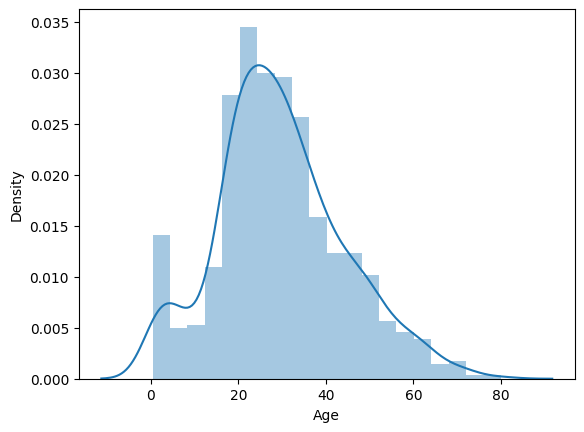

In [889]:
import seaborn as sns
sns.distplot(df['Age'])

In [890]:
df['Age'].skew()  #Age data is skewed hence we need to use median imputation (Right skewed)

np.float64(0.38910778230082704)

In [891]:
# Second step encoding

In [892]:
from sklearn.preprocessing import TargetEncoder
from sklearn.impute import SimpleImputer
si=SimpleImputer()
tar=TargetEncoder() #Here we can use any encoder  

In [893]:
tar.fit_transform(df[['Sex']],df['Survived'])

array([[0.19291298],
       [0.73590437],
       [0.73835903],
       [0.73835903],
       [0.18112079],
       [0.19291298],
       [0.17948522],
       [0.2024417 ],
       [0.73590437],
       [0.73590437],
       [0.73835903],
       [0.710338  ],
       [0.18112079],
       [0.19291298],
       [0.74582818],
       [0.73590437],
       [0.18992725],
       [0.18112079],
       [0.77567102],
       [0.73835903],
       [0.19291298],
       [0.19291298],
       [0.74582818],
       [0.18112079],
       [0.77567102],
       [0.710338  ],
       [0.18992725],
       [0.19291298],
       [0.77567102],
       [0.18992725],
       [0.18112079],
       [0.74582818],
       [0.74582818],
       [0.2024417 ],
       [0.18992725],
       [0.2024417 ],
       [0.19291298],
       [0.18112079],
       [0.73835903],
       [0.73590437],
       [0.73590437],
       [0.77567102],
       [0.18112079],
       [0.74582818],
       [0.73835903],
       [0.19291298],
       [0.2024417 ],
       [0.710

In [894]:
# Final slowdown of all 3 steps

In [895]:
from sklearn.compose import ColumnTransformer


In [896]:
#Median imputation--Step first

ct1=ColumnTransformer(transformers=[
    ('si_num',SimpleImputer(strategy='median'),[2]),
    ('si_cat',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [ ]:
#Encoding Target encoder----second step

ct2=ColumnTransformer(transformers=[
    ('target',TargetEncoder(random_state=42),[1,6] )
],remainder='passthrough')

In [ ]:
#standardisation Third step

from sklearn.preprocessing import StandardScaler
ct3=ColumnTransformer(transformers=[
    ('standardscaler',StandardScaler(),slice(0,6))
],remainder='passthrough')

In [899]:
# Last step we are using random forest for model selection
# Training testing and all

In [900]:
from sklearn.model_selection import train_test_split

In [901]:
x=df.iloc[:,1:8]
y=df.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4200)

In [902]:
from sklearn.ensemble import RandomForestClassifier

ct4=RandomForestClassifier(n_estimators=200,bootstrap=True,random_state=4200)

from sklearn.pipeline import Pipeline

pipel=Pipeline([
    ('ct2',ct2),
    ('ct1',ct1),
    ('ct3',ct3),
    ('ct4',ct4)
])

In [903]:
pipel.fit(x_train,y_train)

Pipeline(steps=[('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target',
                                                  TargetEncoder(random_state=3),
                                                  [1, 6])])),
                ('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('si_num',
                                                  SimpleImputer(strategy='median'),
                                                  [2]),
                                                 ('si_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('ct3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  slice(0, 6, None))])),
                ('ct4',
                 RandomForestClassifier(n_estimators=200, random_state=4200))])

In [904]:
y_pred=pipel.predict(x_test)


from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8044692737430168